In [1]:
import time
start_time = time.time() # notebook running time 6~7분정도 걸린다.

# Library import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [3]:
file = 'fetal_health.csv'
df = pd.read_csv(file)
df.head() # shape = (2126, 22), target = fetal_health

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [4]:
df['fetal_health'].value_counts() # 불균형 클래스

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

In [5]:
df.info() # every column is non-null, float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


### about columns

In [7]:
## FHR : Fatal Heart Rate
# LB	Fetal heart rate baseline (beats per minute) 
# AC	Number of accelerations per second 
# FM	Number of fetal movements per second
# UC	Number of uterine contractions per second
# DL	Number of light decelerations per second
# DS	Number of severe decelerations per second
# DP	Number of prolonged decelerations per second
# ASTV	Percentage of time with abnormal short-term variability
# MSTV	Mean value of short-term variability
# ALTV	Percentage of time with abnormal long-term variability
# MLTV	Mean value of long-term variability
################## histogram
# Width	Width of FHR histogram
# Min	Minimum of FHR histogram
# Max	Maximum of FHR histogram
# Nmax	Number of histogram peaks
# Nzeros	Number of histogram zeroes
# Mode	Histogram mode
# Median	Histogram median
# Variance	Histogram variance
# Tendency	Histogram tendency
################## target_variable
# NSP	Fetal state        # class code (N=Normal, S=Suspected, P=Pathological)

</br>

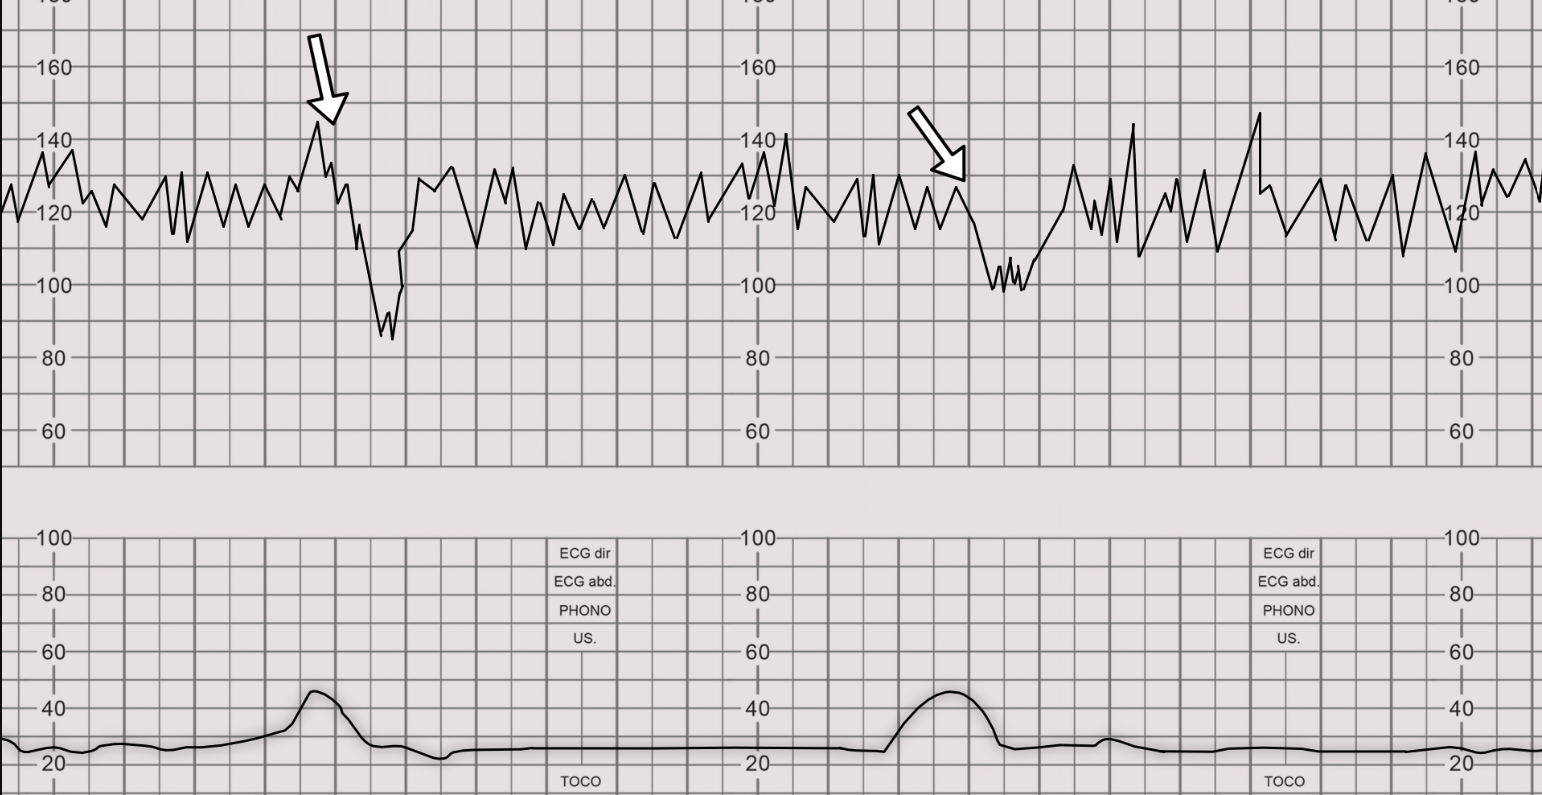
## <b>About data</b>

#### CTG : 입원시의 분만 감시 장치(CTG)는 산모가 분만병동에 입원시 행해지는 태아 심박수(FHR)와 자궁 활동의 짧은(보통 20분) 기록으로 행해지는 일반적인 선별 검사이다.
#### 위의 사진에서 위쪽의 그래프는 태아 심박수(FHR), 아래쪽 그래프는 자궁 활동에 대한 그래프로 보인다.
#### 데이터는 N개의 이런 그래프들에서 추출됐다. 
</br>
</br>

## <b>Histogram</b>

#### histogram은 태아 심박수의 분포에 대한 정보이다. 
#### 예를들어 histogram_min은 태아에게서 기록된 최저 심박수이고 histogram_width는 최대 심박수 - 최소 심박수 이다.
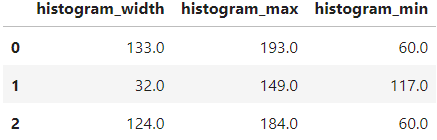
#### 즉 min과 max의 정보로 width가 만들어진다.
</br>
</br>

#### baseline_value, mean, median, mode(분당 태아 심박수, 평균, 중간, 최빈) 값들은 강한 상관관계를 가지고 있다.
</br>

### 결국 Random forest모델을 쓰기 때문에 다중공선성에 대해 자유롭지만,
### 명확히 상관관계를 가지고 있는 열들을 제거 한 뒤 비교해보고 싶었다.

# EDA

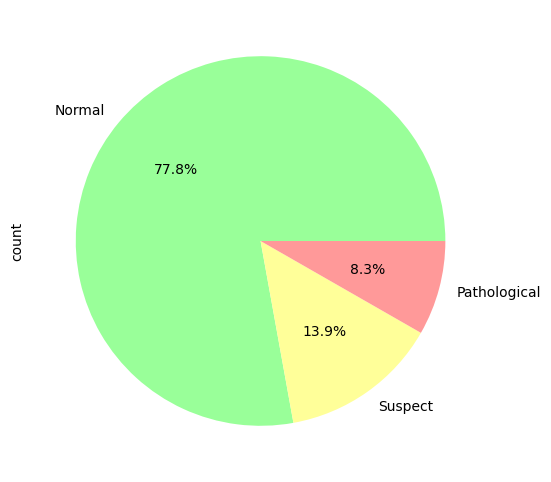

In [8]:
labels = ['Normal', 'Suspect', 'Pathological']
colors = ['#99ff99', '#ffff99', '#ff9999']
df['fetal_health'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), labels=labels, colors=colors)
plt.show() # 건강한 태아들이 많은 모습이다. (불균형 클래스)

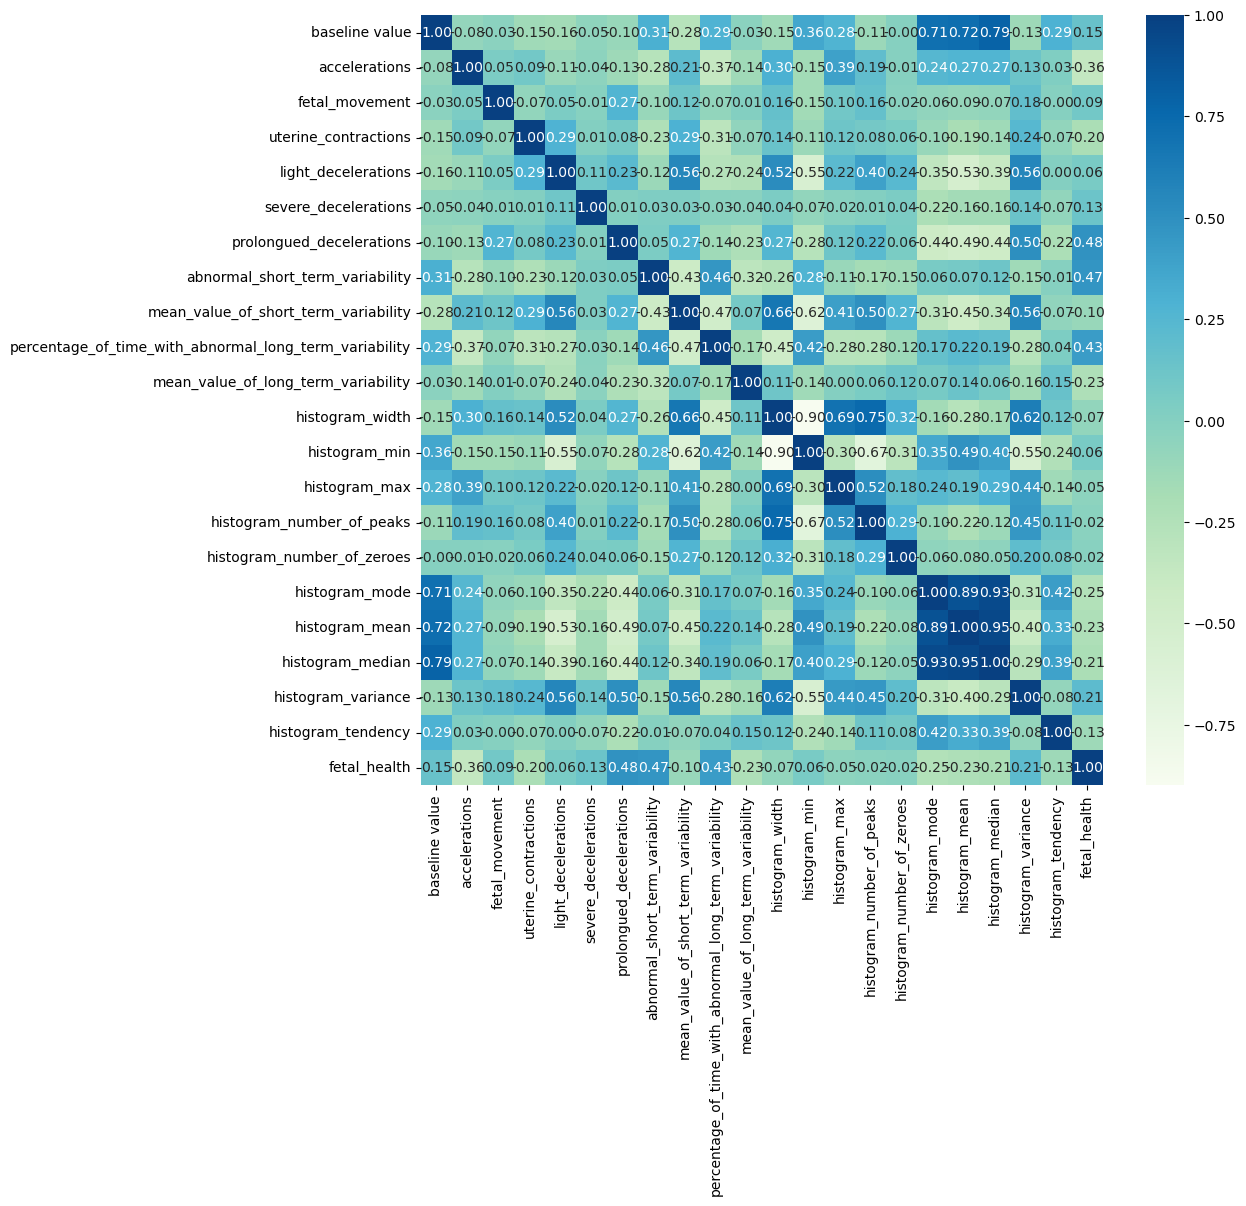

In [9]:
plt.figure(figsize=(11,10))  
p=sns.heatmap(df.corr(), annot=True, cmap = "GnBu", fmt=".2f") # 상관계수행렬, 트리모델이라 보는 의미는 없다.

In [10]:
print('nunique of each column\n')
for l in df.columns:
    print(f'{l} : {df[l].nunique()}')

nunique of each column

baseline value : 48
accelerations : 20
fetal_movement : 102
uterine_contractions : 16
light_decelerations : 16
severe_decelerations : 2
prolongued_decelerations : 6
abnormal_short_term_variability : 75
mean_value_of_short_term_variability : 57
percentage_of_time_with_abnormal_long_term_variability : 87
mean_value_of_long_term_variability : 249
histogram_width : 154
histogram_min : 109
histogram_max : 86
histogram_number_of_peaks : 18
histogram_number_of_zeroes : 9
histogram_mode : 88
histogram_mean : 103
histogram_median : 95
histogram_variance : 133
histogram_tendency : 3
fetal_health : 3


In [11]:
# df.isnull().sum()
# non-null

In [12]:
df[df.duplicated()]
# 중복값 있지만 우연히 같은 값이 겹쳤을것
# 데이터의 NULL값도 없이 깨끗하고 애초에 열들의 nunique가 많지가 않아서 겹칠 수 있다.

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
68,140.0,0.007,0.000,0.004,0.0,0.0,0.0,34.0,1.2,0.0,...,119.0,179.0,2.0,0.0,156.0,153.0,155.0,5.0,0.0,1.0
234,123.0,0.000,0.000,0.000,0.0,0.0,0.0,49.0,0.8,7.0,...,63.0,137.0,2.0,0.0,129.0,127.0,129.0,2.0,1.0,1.0
306,145.0,0.000,0.020,0.000,0.0,0.0,0.0,77.0,0.2,45.0,...,129.0,150.0,1.0,0.0,146.0,145.0,147.0,0.0,1.0,2.0
324,135.0,0.000,0.000,0.000,0.0,0.0,0.0,62.0,0.5,71.0,...,71.0,168.0,3.0,0.0,143.0,142.0,144.0,1.0,1.0,3.0
333,144.0,0.000,0.019,0.000,0.0,0.0,0.0,76.0,0.4,61.0,...,71.0,152.0,3.0,0.0,145.0,144.0,146.0,2.0,1.0,2.0
787,123.0,0.003,0.003,0.000,0.0,0.0,0.0,52.0,0.8,2.0,...,50.0,140.0,7.0,0.0,129.0,128.0,130.0,4.0,1.0,1.0
791,123.0,0.003,0.004,0.000,0.0,0.0,0.0,50.0,0.9,4.0,...,58.0,140.0,7.0,0.0,129.0,128.0,130.0,5.0,1.0,1.0
798,146.0,0.000,0.000,0.003,0.0,0.0,0.0,65.0,0.4,39.0,...,137.0,156.0,1.0,0.0,150.0,149.0,151.0,1.0,1.0,2.0
849,138.0,0.002,0.000,0.004,0.0,0.0,0.0,41.0,0.8,8.0,...,105.0,156.0,4.0,0.0,142.0,142.0,143.0,2.0,1.0,1.0
1113,122.0,0.000,0.000,0.000,0.0,0.0,0.0,19.0,1.9,0.0,...,103.0,142.0,1.0,0.0,120.0,120.0,122.0,3.0,0.0,1.0


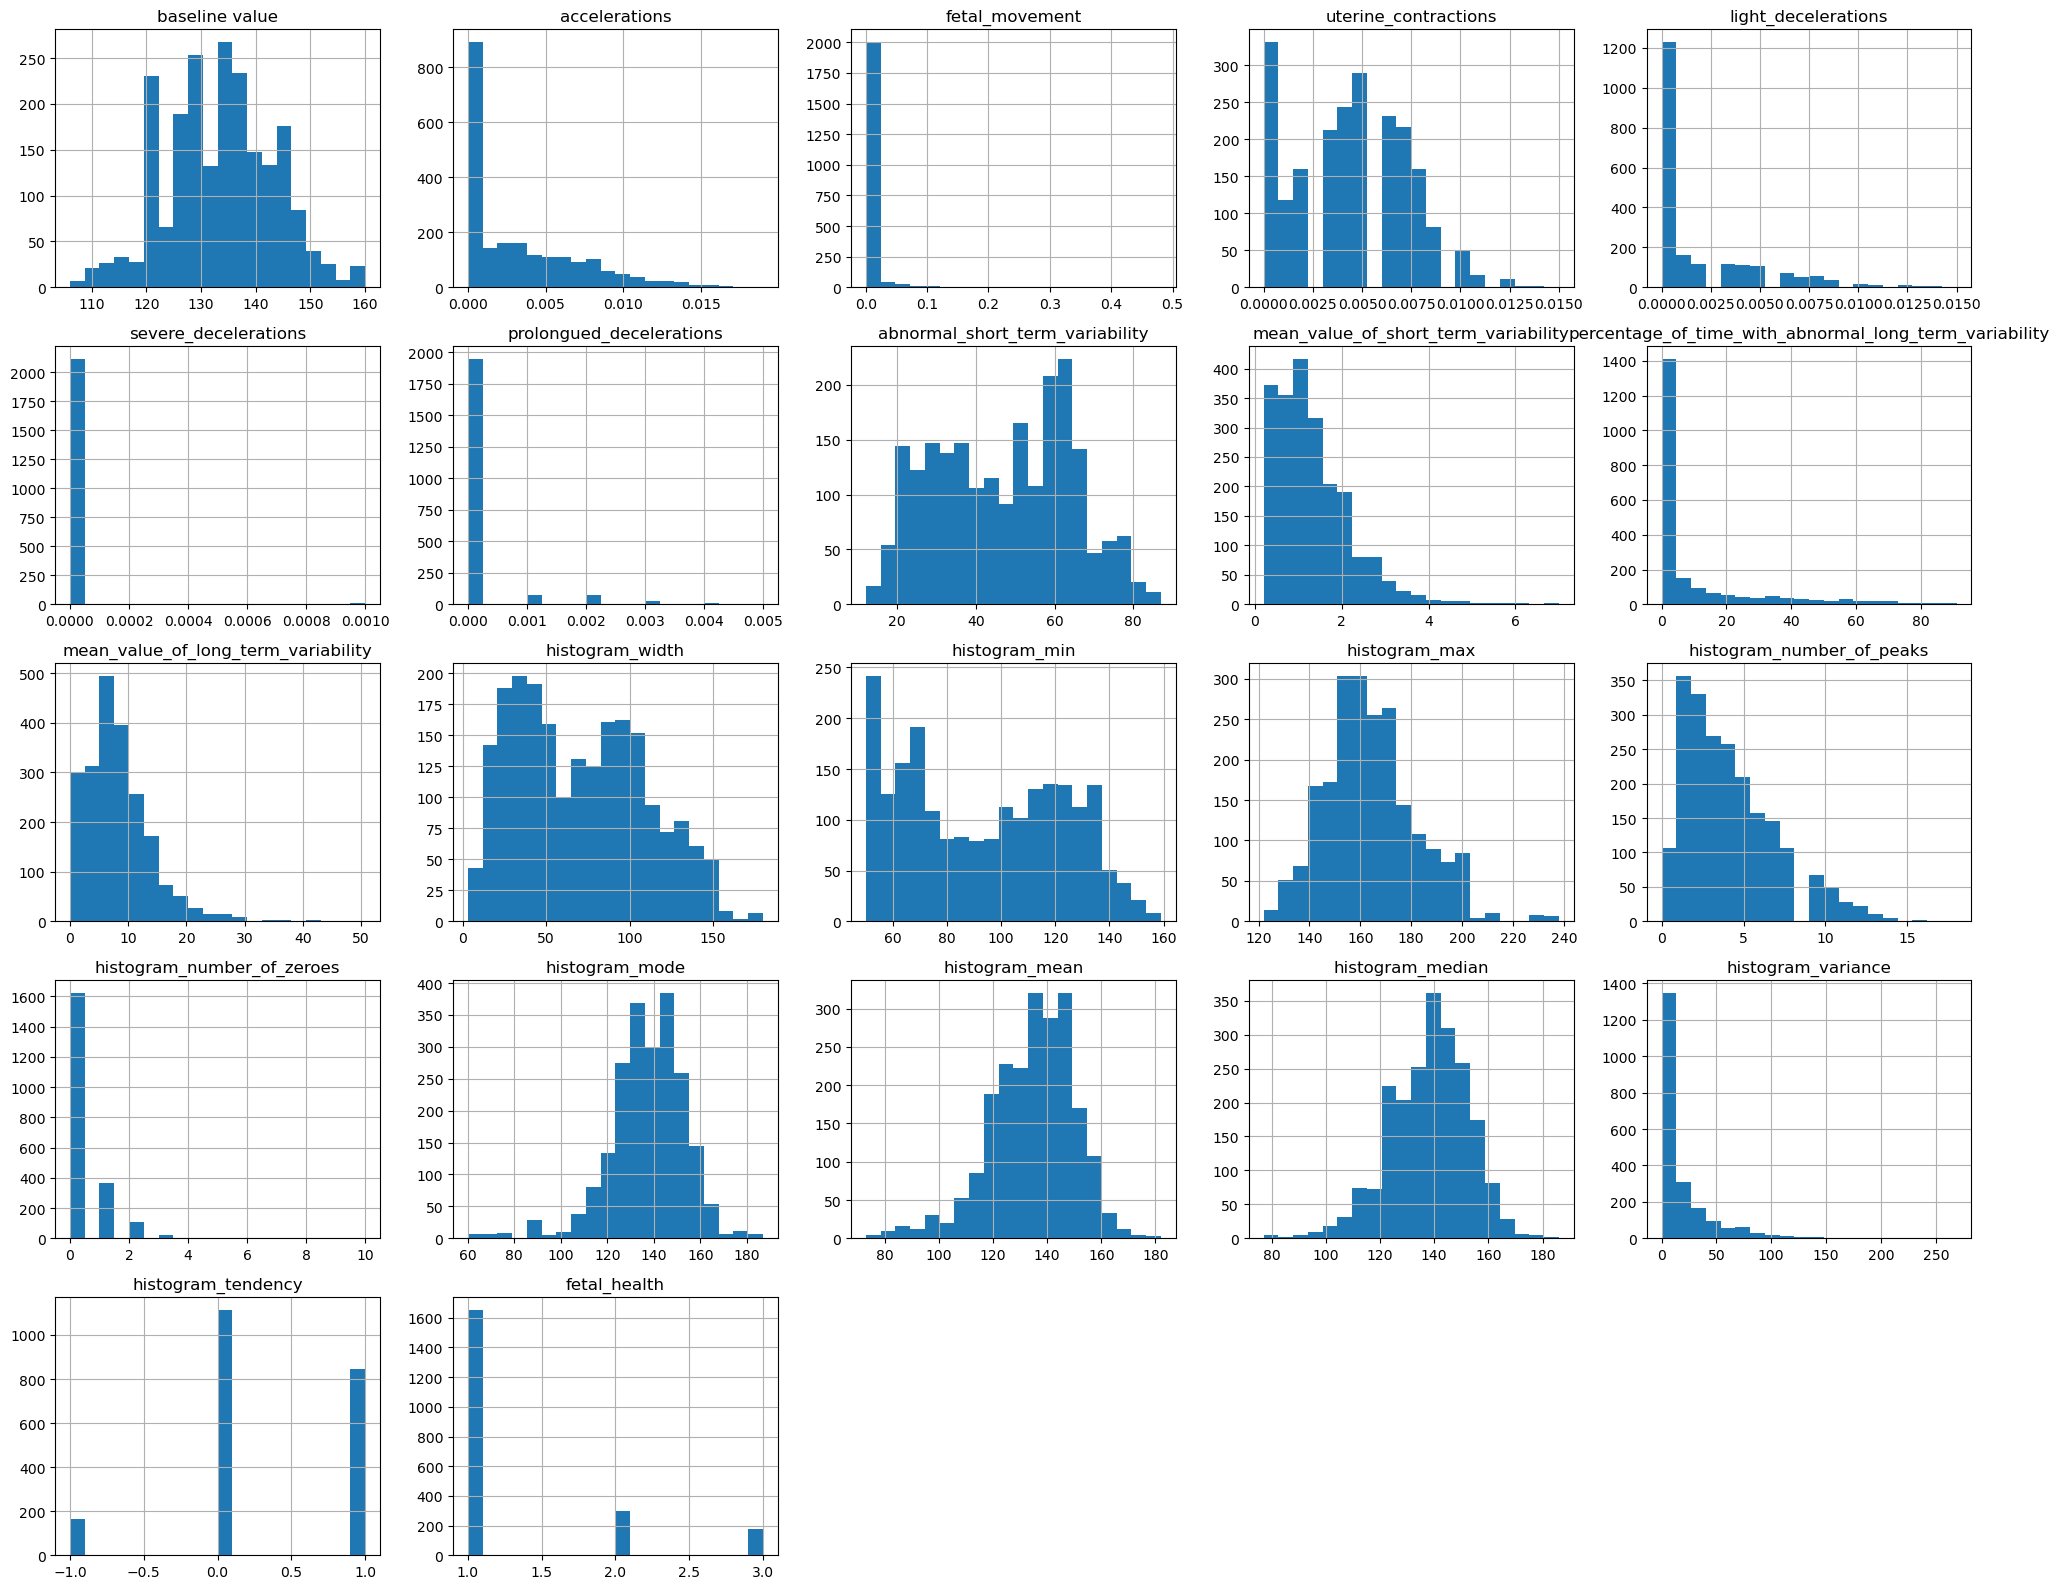

In [13]:
df.hist(figsize=(20, 16), bins=20)
plt.tight_layout()

# Fitting

### define model fitting function

In [14]:
def model_fitting(X, y, preprocessing=None, n=None, random_state=None):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)
    
    if preprocessing == None:
        pass
    else:
        if n != None:
            X_train, y_train = preprocessing(X_train, y_train, n=n, random_state=random_state)
        else:
            X_train, y_train = preprocessing(X_train, y_train, random_state=random_state)
    
    rf = RandomForestClassifier(random_state=random_state)

    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)

    print("Accuracy of the model :", accuracy_score(y_test, pred))
    print()
    print("confusion matrix \n", confusion_matrix(y_test, pred))
    print()
    print(classification_report(y_test, pred))

### Use all features

In [15]:
# random forest라서 모든 변수를 써도 무방하다

In [16]:
y = df['fetal_health']
X = df.drop(['fetal_health'], axis=1) 

In [17]:
# random_seed = np.random.randint(100)
random_seed = 23 # 보고서 기준
print(f'random_state : {random_seed}')

random_state : 23


#### Full model

In [18]:
model_fitting(X, y, random_state=random_seed)  # 표본이 많은 1번 클래스에 대해서 예측력(Recall)이 높다.
                                                # 하지만 건강하지 않을 태아를 조기선별하는 문제에서는
                                                # 양성(건강하지 않은, 2, 3번 클래스)을 음성(1번 클래스)으로 분류하는 리스크가
                                                # 음성을 양성으로 분류하는 리스크보다 크기 때문에 좋은 모델이 아니라는 생각이 든다.
                                                # class imbalance 문제를 oversampling, undersampling 등으로 해결해보자

Accuracy of the model : 0.9507042253521126

confusion matrix 
 [[331   5   1]
 [ 10  45   0]
 [  2   3  29]]

              precision    recall  f1-score   support

         1.0       0.97      0.98      0.97       337
         2.0       0.85      0.82      0.83        55
         3.0       0.97      0.85      0.91        34

    accuracy                           0.95       426
   macro avg       0.93      0.88      0.90       426
weighted avg       0.95      0.95      0.95       426



### define sampling functions

#### oversampling

In [19]:
def bootstrap_oversampling(X, y, random_state=None):
    target_name = y.name
    df_tmp = pd.concat([X, y], axis=1)
    
    df1 = df_tmp[df_tmp[target_name] == 1]
    n1 = df1.shape[0]
    
    df_tmp_bootstrap = pd.concat([df1,
                                  df_tmp[df_tmp[target_name] == 2].sample(n=n1, replace=True, random_state=random_state), 
                                  df_tmp[df_tmp[target_name] == 3].sample(n=n1, replace=True, random_state=random_state)])
    
    y = df_tmp_bootstrap[target_name]
    X = df_tmp_bootstrap.drop([target_name], axis=1)
    
    return X, y

In [20]:
def SMOTE_oversampling(X, y, random_state=None):
    from imblearn.over_sampling import SMOTE

    smote = SMOTE(random_state=random_state)

    X_SMOTE, y_SMOTE = smote.fit_resample(X, y)
    
    return X_SMOTE, y_SMOTE

#### Undersampling

In [21]:
def Undersampling(X, y, random_state=None):
    target_name = y.name
    df_tmp = pd.concat([X, y], axis=1)
    
    df_tmp_3 = df_tmp[df_tmp[target_name] == 3]
    n3 = df_tmp_3.shape[0]
    
    df_tmp_us = pd.concat([df_tmp[df_tmp['fetal_health'] == 1].sample(n=n3, random_state=random_state),
                           df_tmp[df_tmp['fetal_health'] == 2].sample(n=n3, random_state=random_state),
                           df_tmp_3])

    y = df_tmp_us[target_name]
    X = df_tmp_us.drop([target_name], axis=1)
    
    return X, y

#### Over & Under

In [22]:
def Over_and_under_sampling(X, y, n, random_state=None):
    target_name = y.name
    df_tmp = pd.concat([X, y], axis=1)
    
    df1 = df_tmp[df_tmp[target_name] == 1]
    df2 = df_tmp[df_tmp[target_name] == 2]
    df3 = df_tmp[df_tmp[target_name] == 3]
    
    df_over_under = pd.concat([df1.sample(n=n, random_state=random_state),
                               df2.sample(n=n, replace=True, random_state=random_state),
                               df3.sample(n=n, replace=True, random_state=random_state)])

    y = df_over_under[target_name]
    X = df_over_under.drop([target_name], axis=1)
    
    return X, y

In [23]:
def SMOTE_and_under_sampling(X, y, n, random_state=None):
    target_name = y.name
    df_tmp = pd.concat([X, y], axis=1)
    
    df1 = df_tmp[df_tmp[target_name] == 1]
    df2 = df_tmp[df_tmp[target_name] == 2]
    df3 = df_tmp[df_tmp[target_name] == 3]
    
    df_tmp = pd.concat([df1.sample(n=n, random_state=random_state), df2, df3])
    
    y = df_tmp[target_name]
    X = df_tmp.drop([target_name], axis=1)
    
    X, y = SMOTE_oversampling(X, y, random_state=random_state)
    
    return X, y

### Fitting

#### Bootstrap

In [24]:
model_fitting(X, y, bootstrap_oversampling, random_state=random_seed) 

Accuracy of the model : 0.9460093896713615

confusion matrix 
 [[328   6   3]
 [  9  46   0]
 [  2   3  29]]

              precision    recall  f1-score   support

         1.0       0.97      0.97      0.97       337
         2.0       0.84      0.84      0.84        55
         3.0       0.91      0.85      0.88        34

    accuracy                           0.95       426
   macro avg       0.90      0.89      0.90       426
weighted avg       0.95      0.95      0.95       426



#### SMOTE

In [25]:
model_fitting(X, y, SMOTE_oversampling, random_state=random_seed)
# scikit-learn 1.3.2 버전에서는 오류가 뜸
# scikit-learn 1.2.2 버전에서는 잘 돌아감

Accuracy of the model : 0.9389671361502347

confusion matrix 
 [[323  11   3]
 [  9  46   0]
 [  2   1  31]]

              precision    recall  f1-score   support

         1.0       0.97      0.96      0.96       337
         2.0       0.79      0.84      0.81        55
         3.0       0.91      0.91      0.91        34

    accuracy                           0.94       426
   macro avg       0.89      0.90      0.90       426
weighted avg       0.94      0.94      0.94       426



#### Undersampling

In [26]:
model_fitting(X, y, Undersampling, random_state=random_seed) 

Accuracy of the model : 0.8896713615023474

confusion matrix 
 [[300  29   8]
 [  6  48   1]
 [  0   3  31]]

              precision    recall  f1-score   support

         1.0       0.98      0.89      0.93       337
         2.0       0.60      0.87      0.71        55
         3.0       0.78      0.91      0.84        34

    accuracy                           0.89       426
   macro avg       0.79      0.89      0.83       426
weighted avg       0.91      0.89      0.90       426



#### Over&Under

In [27]:
model_fitting(X, y, Over_and_under_sampling, 700, random_state=random_seed)

Accuracy of the model : 0.931924882629108

confusion matrix 
 [[323  11   3]
 [  8  46   1]
 [  2   4  28]]

              precision    recall  f1-score   support

         1.0       0.97      0.96      0.96       337
         2.0       0.75      0.84      0.79        55
         3.0       0.88      0.82      0.85        34

    accuracy                           0.93       426
   macro avg       0.87      0.87      0.87       426
weighted avg       0.93      0.93      0.93       426



#### SMOTE&Under

In [28]:
model_fitting(X, y, SMOTE_and_under_sampling, 700, random_state=random_seed)

Accuracy of the model : 0.9342723004694836

confusion matrix 
 [[319  14   4]
 [  7  48   0]
 [  2   1  31]]

              precision    recall  f1-score   support

         1.0       0.97      0.95      0.96       337
         2.0       0.76      0.87      0.81        55
         3.0       0.89      0.91      0.90        34

    accuracy                           0.93       426
   macro avg       0.87      0.91      0.89       426
weighted avg       0.94      0.93      0.94       426



### Select preprocessing method 

#### 2번과 3번 클래스에 대한 recall 값이 높은 모델을 원하기 때문에(특히 3번) 
#### 2번 3번 클래스의 recall값 중 3번에 대한 recall 값에 가중치를 주어 가중평균을 구해서 불균형 클래스 문제를 해결하기 위한 전처리 방법을 결정해보자

#### Scoring function

In [29]:
def scoring(X, y, N:'int', preprocessing=None, n:'list'=None): # random_state를 주지않고 N번만큼 반복
    def _model_fitting(X, y, preprocessing=None, n=None, random_state=None):
        from sklearn.model_selection import train_test_split
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)

        if preprocessing == None:
            pass
        else:
            if n != None:
                X_train, y_train = preprocessing(X_train, y_train, n=n, random_state=random_state)
            else:
                X_train, y_train = preprocessing(X_train, y_train, random_state=random_state)
        
        rf = RandomForestClassifier(random_state=random_state)

        rf.fit(X_train, y_train)
        pred = rf.predict(X_test)

        report = classification_report(y_test, pred, output_dict=True)

        return (report['2.0']['recall'] + 4*report['3.0']['recall']) / 5 #3번 클래스의 recall값에 가중치를 두어서 모델을 평가했다.
    
    if n == None:
        scores = []
    else:
        scores = [[] for _ in range(len(n))]
        
    for i in range(N):
        if n == None:
            score = _model_fitting(X, y, preprocessing)
            scores.append(score)
        else:
            for j in range(len(n)):
                score = _model_fitting(X, y, preprocessing, n[j])
                scores[j].append(score)
        
        
    if n==None:    
        return sum(scores) / len(scores)
    else:
        return [f'n = {n[k]} : {sum(scores[k]) / len(scores[0])}' for k in range(len(scores))]
    

In [30]:
scoring(X, y, 100) # 기본 모델  100번 반복 후 평균
# (0.2 * 2번클래스의 recall) + (0.8 * 3번클래스의 recall)

0.8580232385377012

In [31]:
scoring(X, y, 100, bootstrap_oversampling) # 부트스트랩

0.8715377347819684

In [32]:
scoring(X, y, 100, SMOTE_oversampling) # 오버 샘플링의 경우는 bootstrap 방법보다 SMOTE 방법으로 표본을 늘렸을 때 더 좋은 결과가 나온다.

0.8988082287948074

In [33]:
scoring(X, y, 100, Undersampling) # 다수 클래스의 표본 수가 급감하여 accuracy는 매우 떨어지지만 2번 3번 클래스에 대한 예측 성능은 가장 좋은 모습이다.

0.9234329134693966

In [34]:
scoring(X, y, 100, Over_and_under_sampling, [400, 600, 800, 1000])

['n = 400 : 0.9069888429889127',
 'n = 600 : 0.8964715255637701',
 'n = 800 : 0.8930610973084575',
 'n = 1000 : 0.8858009882659175']

In [35]:
scoring(X, y, 100, SMOTE_and_under_sampling, [400, 600, 800, 1000]) # 오버 샘플링과 언더 샘플링을 같이 했을 땐 n이 400~600일 때 좋은 점수가 나왔다.
# N * len(n) 번 모델적합을 반복을 하기 때문에 코드 돌리는데 시간이 좀 걸림

['n = 400 : 0.9208256413128368',
 'n = 600 : 0.9110889706506997',
 'n = 800 : 0.9061738967925739',
 'n = 1000 : 0.9034571248888636']

### 결과

전체적으로 class imbalance 문제를 해결하면 모델의 성능이 향상되는 모습이다. </br>

2번 3번에 대한 예측성능을 올리기 위해선 언더샘플링이나 언더샘플링과 오버샘플링을 혼합한 방법으로 불균형 클래스문제를 해결하는것이 좋아보인다.

두 방법으로 학습했을때의 일반화된 성능을 측정하기 위해서 교차검증을 해보자.

# Cross Validation

### define K-fold CV function

In [36]:
def k_fold_cv(X, y, preprocessing=None, n=None, k=5):
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.ensemble import RandomForestClassifier
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    if preprocessing == None:
        pass
    else:
        if n != None:
            X_train, y_train = preprocessing(X_train, y_train, n=n)
        else:
            X_train, y_train = preprocessing(X_train, y_train)
        
    rf = RandomForestClassifier()

    rf.fit(X_train, y_train)
    
    train_score = rf.score(X_train, y_train)
    test_score = rf.score(X_test, y_test)

    cv_scores = cross_val_score(rf, X_train, y_train, cv=k)
    cv_score_mean = np.round(np.mean(cv_scores), 3)
#     print(f'train_score : {train_score:.3f}, test_score : {test_score:.3f}')
#     print(f"mean of validation scores : {cv_score_mean}, std of validation scores : {np.std(cv_scores):.3f}")
    
    return np.round(test_score, 3), cv_score_mean

In [37]:
# k-fold 한번씩 하면 할때마다 다른 결과가 나와서 여러번 돌려서 비교 (시간은 좀 걸린다 )
def k_fold_iter(X, y, N,preprocessing=None, n=None, k=5):
    test = []
    validation = []
    for _ in range(N):
        t, v = k_fold_cv(X, y, preprocessing, n, k)
        test.append(t)
        validation.append(v)
    
    print(f'test score: {(sum(test) / len(test)):.3f}, validation score: {(sum(validation) / len(validation)):.3f}')

In [38]:
k_fold_iter(X, y, 30, bootstrap_oversampling) # 과적합이 의심됨

test score: 0.941, validation score: 0.988


In [39]:
k_fold_iter(X, y, 30, SMOTE_oversampling) # bootstrap 보다는 차이가 적지만 여전히 과적합이 의심된다.

test score: 0.936, validation score: 0.978


In [40]:
k_fold_iter(X, y, 30, Undersampling) # 둘다 비슷하게 나온다. 과적합은 없는듯 하다.

test score: 0.893, validation score: 0.891


In [41]:
k_fold_iter(X, y, 30, Over_and_under_sampling, 400) # train set과 validation set 간에 겹치는 데이터가 SMOTE 보다 더 많아 과적합이 발생한것 같다. 

test score: 0.923, validation score: 0.962


In [42]:
k_fold_iter(X, y, 30, SMOTE_and_under_sampling, 400) # bootstrap으로 오버샘플링 한 것 보다는 과적합이 덜 일어난 모습이다.

test score: 0.921, validation score: 0.943


In [43]:
# train set에서 가장 희소한 클래스인 3번 클래스의 표본 수는 약 140이다.
# 각 클래스 표본 수를 140에서 늘릴수록 test score은 늘고 과적합 위험도 늘어나는 모습이다.

# Hyper parameters tuning

### Selected model

In [44]:
def model_fitting(X, y, preprocessing=None, n=None, random_state=None):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)
    
    if preprocessing == None:
        pass
    else:
        if n != None:
            X_train, y_train = preprocessing(X_train, y_train, n=n, random_state=random_state)
        else:
            X_train, y_train = preprocessing(X_train, y_train, random_state=random_state)
        
    rf = RandomForestClassifier(random_state=random_state)

    rf.fit(X_train, y_train)
    
    return rf

In [45]:
model = model_fitting(X, y, SMOTE_and_under_sampling, 400, random_seed)

### Gridsearch

In [46]:
# 하이퍼 파라미터 조합을 대상으로 모델을 학습하고 평가하여 최적의 모델을 찾는다.
# n_estimators : 트리의 개수 ( default = 100 )
# 일반적으로 많으면 좋다고 한다. [80, 100, 120, 150]으로 설정
# max_depth : 트리의 깊이 ( 깊어질 수록 더 세밀하게 분류한다. ) [7, 10, 12, 15]
# max_features : 트리별로 사용 할 feature의 개수, 분류문제에선 일반적으로 sqrt(p) 를 사용한다고 한다. 
# 이 데이터셋에서 sqrt(p)는 4.x 이니 [3, 4, 5, 7] 으로

In [47]:
from sklearn.metrics import make_scorer, recall_score
from sklearn.model_selection import GridSearchCV
import warnings

def recall_class_2_3(y_true, y_pred): #정해둔 지표를 search 기준으로 하기 위한 함수
    warnings.filterwarnings('ignore')
    return 0.2*recall_score(y_true, y_pred, pos_label="2.0", average='macro') + 0.8*recall_score(y_true, y_pred, pos_label="3.0", average='macro')

recall_2_3 = make_scorer(recall_class_2_3)

In [48]:
rf_params = {
        'n_estimators' : [80, 100, 120, 150],
        'max_depth': [7, 10, 12, 15],
        'max_features' : [3, 4, 5, 7]
}
# 4*4*4 = 64개의 하이퍼파라미터 조합


In [49]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(model, param_grid=rf_params, scoring=recall_2_3, n_jobs=-1) # Recall값의 평균
rf_grid.fit(X, y)

GridSearchCV(estimator=RandomForestClassifier(random_state=23), n_jobs=-1,
             param_grid={'max_depth': [7, 10, 12, 15],
                         'max_features': [3, 4, 5, 7],
                         'n_estimators': [80, 100, 120, 150]},
             scoring=make_scorer(recall_class_2_3))

In [50]:
rf_grid.best_params_, rf_grid.best_score_ # 정해둔 파라미터의 끝 값이 나왔지만 더 탐색하진 않았다.
# n_estimators:80, max_features:7 

({'max_depth': 10, 'max_features': 7, 'n_estimators': 80}, 0.7861557212025747)

In [51]:
def model_fitting(X, y, preprocessing=None, n=None, random_state=None):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_state)
    
    if preprocessing == None:
        pass
    else:
        if n != None:
            X_train, y_train = preprocessing(X_train, y_train, n=n, random_state=random_state)
        else:
            X_train, y_train = preprocessing(X_train, y_train, random_state=random_state)
        
    rf = RandomForestClassifier(n_estimators=80, max_depth=10, max_features=7, random_state=random_state, oob_score=True)

    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    
    print(confusion_matrix(y_test, pred))
    print()
    print(classification_report(y_test, pred))
    
    return rf

In [52]:
model = model_fitting(X, y, SMOTE_and_under_sampling, 400, random_seed)

[[306  26   5]
 [  6  49   0]
 [  1   1  32]]

              precision    recall  f1-score   support

         1.0       0.98      0.91      0.94       337
         2.0       0.64      0.89      0.75        55
         3.0       0.86      0.94      0.90        34

    accuracy                           0.91       426
   macro avg       0.83      0.91      0.86       426
weighted avg       0.93      0.91      0.91       426



# Measure Feature Importance

### MDI

In [53]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

df.columns[indices], importances[indices]

df_importances_MDI = pd.DataFrame({'Feature': df.columns[indices], 'Importance_MDI': importances[indices]})
df_importances_MDI

,Feature,Importance_MDI
0,abnormal_short_term_variability,0.138044
1,histogram_mean,0.136689
2,percentage_of_time_with_abnormal_long_term_var...,0.127262
3,mean_value_of_short_term_variability,0.101218
4,histogram_median,0.099307
5,prolongued_decelerations,0.069048
6,accelerations,0.064232
7,mean_value_of_long_term_variability,0.055211
8,histogram_mode,0.046054
9,baseline value,0.031188


In [54]:
df_importances_MDI = df_importances_MDI.sort_values('Importance_MDI', ascending=False).reset_index()
df_importances_MDI['rank_MDI'] = df_importances_MDI['index'] + 1
df_importances_MDI = df_importances_MDI.drop(['index'], axis=1)


In [55]:
df_importances_MDI

,Feature,Importance_MDI,rank_MDI
0,abnormal_short_term_variability,0.138044,1
1,histogram_mean,0.136689,2
2,percentage_of_time_with_abnormal_long_term_var...,0.127262,3
3,mean_value_of_short_term_variability,0.101218,4
4,histogram_median,0.099307,5
5,prolongued_decelerations,0.069048,6
6,accelerations,0.064232,7
7,mean_value_of_long_term_variability,0.055211,8
8,histogram_mode,0.046054,9
9,baseline value,0.031188,10


In [56]:
print(f'total running time : {time.time() - start_time} seconds') # 6~7분정도 걸린다.

total running time : 386.7352178096771 seconds
